# Fuzzy Logic Controller

https://scikit-fuzzy.github.io/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

Let’s create a fuzzy control system which models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

- Antecedents (Inputs)
    - service
        - Universe (ie, crisp value range): How good was the service of the wait staff, on a scale of 0 to 10?
        - Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
    - food quality
        - Universe: How tasty was the food, on a scale of 0 to 10?
        - Fuzzy set: bad, decent, great

- Consequents (Outputs)
    - tip
        - Universe: How much should we tip, on a scale of 0% to 25%
        - Fuzzy set: low, medium, high

- Rules
    - IF the service was good or the food quality was good, THEN the tip will be high.
    - IF the service was average, THEN the tip will be medium.
    - IF the service was poor or the food quality was poor THEN the tip will be low.

- Usage
    - If I tell this controller that I rated:
        - the service as 9.8, and
        - the quality as 6.5,
    - it would recommend I leave:
        - a 20.2% tip.

# Define Membership Function of Antecendent and Consequent

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

In [3]:
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [4]:
service.automf(3)
quality.automf(3)

In [5]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

/Users/ardyseto/opt/miniconda3/envs/fuzz/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


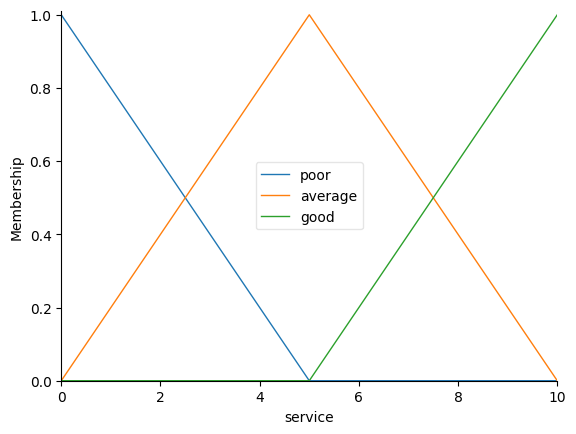

In [6]:
service.view()

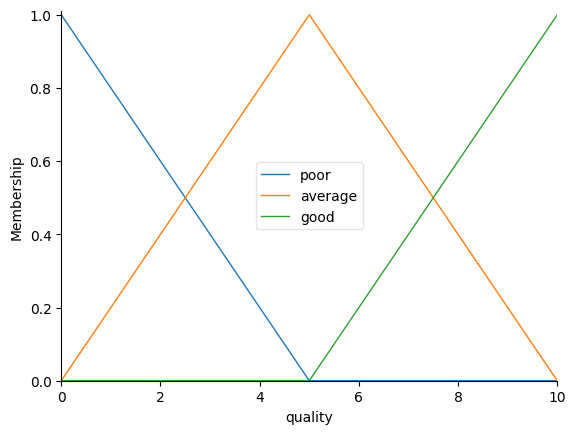

In [7]:
quality.view()

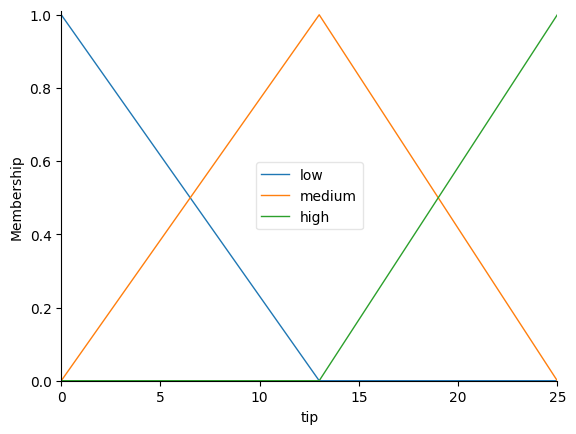

In [8]:
tip.view()

/Users/ardyseto/opt/miniconda3/envs/fuzz/lib/python3.11/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


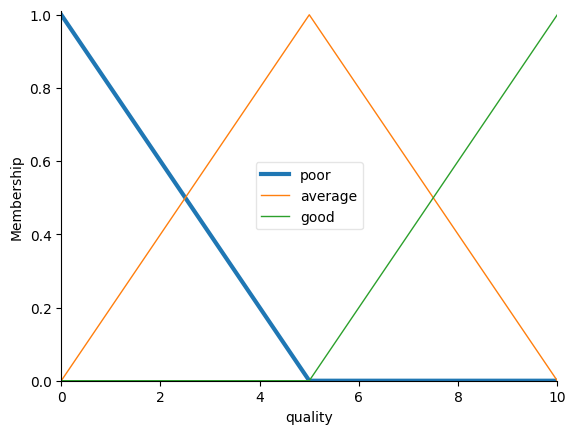

In [9]:
quality['poor'].view()

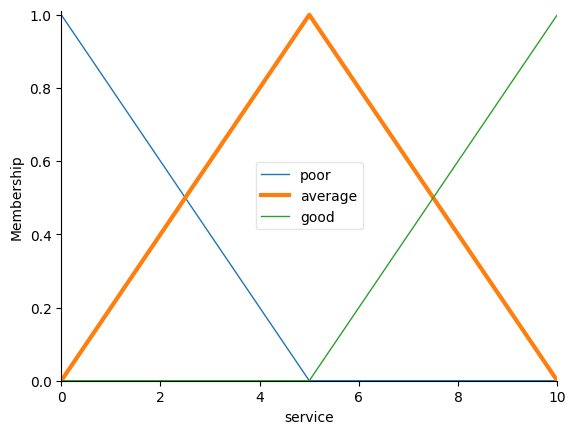

In [10]:
service['average'].view()

# Create Rule Base

In [21]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

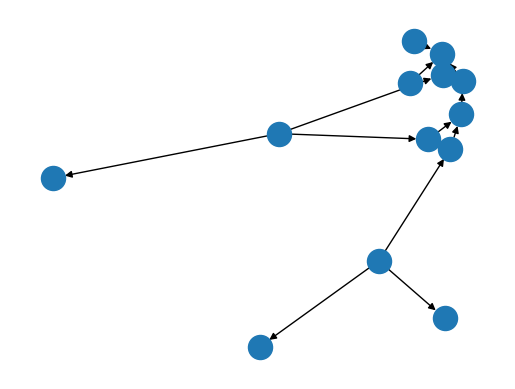

In [22]:
rule1.view();

# Create Control System

In [23]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [24]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [25]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['service'] = 9.8
tipping.input['quality'] = 6.5

In [26]:
# Crunch the numbers
tipping.compute()

In [27]:
print(tipping.output['tip'])

19.847607361963192


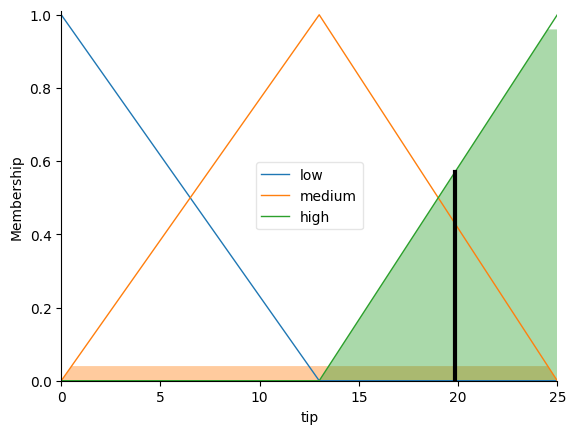

In [28]:
tip.view(sim=tipping)

# Tugas

## Buatlah program dengan kasus di bawah ini

Rancanglah sebuah program pengontrol fuzzy untuk turbin uap. Diketahui input dari pengontrol fuzzy sebagai suhu dan tekanan, outputnya adalah pengaturan throttle dari turbin uap. Gunakan 3 deskriptor untuk variabel input dan 5 deskriptor untuk variabel output. Buatlah seperangkat aturan untuk tindakan pengontrol dan dapatkan nilai defuzzifikasi. Nilai yang dapat dibaca oleh sensor adalah rentang dari 0-120C untuk sensor suhu dan tekanan 0-150 Psi untuk sensor pressure. Skala dari throttle turbin uap adalah 0-100%.

Asumsikan saat ini suhu 30 C dan tekanan 40 Psi, berapakah nilai dari posisi throttle turbin untuk kondisi saat ini?